# Sentiment Analysis

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
import gensim


In [2]:
import os
os.chdir('D:\\coginitor\\analyticvidya\\sentiment final')                   #D:\coginitor\analyticvidya

In [3]:
data1  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
5,7926,#Repost @getbakednfried with repostapp ・・・ to ...
6,7927,This new apple software update is really doing...
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appl...
8,7929,I'm confused...why did I have to take the time...
9,7930,Fruit just tastes better when you pick it your...


In [5]:
train = data1.append(test, ignore_index=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
train

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...
8,9,0.0,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...


# cleaning of both data

In [7]:
train['tweet'] = train['tweet'].str.replace('@[^\w\s://!;]*','')
train['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [8]:
train['tweet'] = train['tweet'].str.replace("[^a-zA-Z#]", " ")
train['tweet']

0       #fingerprint #Pregnancy Test https   goo gl h ...
1       Finally a transparant silicon case    Thanks t...
2       We love this  Would you go  #talk #makememorie...
3       I m wired I know I m George I was made that wa...
4       What amazing service  Apple won t even talk to...
5       iPhone software update fucked up my phone big ...
6       Happy for us    #instapic #instadaily #us #son...
7       New Type C charger cable #UK http   www ebay c...
8       Bout to go shopping again listening to music #...
9       Photo  #fun #selfie #pool #water #sony #camera...
10      hey #apple when you make a new ipod dont make ...
11      Ha  Not heavy machinery but it does what I nee...
12      Contemplating giving in to the iPhone bandwago...
13      I just made another crazy purchase lol my theo...
14      shaqlockholmes sam louise     the battery is s...
15      From #DeepEllum towards #downtown #Dallas  #Bi...
16      Like and Share if you want this  D Phone Case ...
17      Go cra

# Python lambda (Anonymous Functions) | filter, map, reduce
In Python, anonymous function means that a function is without a name. As we already know that def keyword is used to define the normal functions and the lambda keyword is used to create anonymous functions. It has the following syntax:

lambda arguments: expression
This function can have any number of arguments but only one expression, which is evaluated and returned.

In [9]:
train['tweet'] = train['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train['tweet']

0       #fingerprint #Pregnancy Test https MfQV #andro...
1       Finally transparant silicon case Thanks uncle ...
2       love this Would #talk #makememories #unplug #r...
3       wired know George made that #iphone #cute #dav...
4       What amazing service Apple even talk about que...
5       iPhone software update fucked phone time Stupi...
6       Happy #instapic #instadaily #sony #xperia #xpe...
7       Type charger cable http ebay #bay #Amazon #ets...
8       Bout shopping again listening music #iphone #j...
9       Photo #fun #selfie #pool #water #sony #camera ...
10      #apple when make ipod dont make color inches t...
11      heavy machinery does what need Apple really dr...
12      Contemplating giving iPhone bandwagon simply b...
13      just made another crazy purchase theory Work h...
14      shaqlockholmes louise battery painful charge o...
15      From #DeepEllum towards #downtown #Dallas #Big...
16      Like Share want this Phone Case Iphone #iphone...
17      crazy 

# Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words
from our text data First,
let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [10]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

http         4291
#iphone      3094
instagram    2307
#apple       1863
twitter      1458
https        1250
#samsung     1133
instagr       992
#iPhone       989
phone         891
dtype: int64

In [11]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    #fingerprint #Pregnancy Test MfQV #android #ap...
1    Finally transparant silicon case Thanks uncle ...
2    love this Would #talk #makememories #unplug #r...
3    wired know George made that #cute #daventry #home
4    What amazing service Apple even talk about que...
Name: tweet, dtype: object

In [12]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

#stringcheese    1
aIXqFo           1
#brotherinlaw    1
WeSWK            1
Residence        1
IZQeNkiV         1
YSdKiyvEpY       1
#applebees       1
Left             1
Burgled          1
dtype: int64

In [13]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    #fingerprint #Pregnancy Test MfQV #android #ap...
1    Finally transparant silicon case Thanks uncle ...
2    love this Would #talk #makememories #unplug #r...
3    wired know George made that #cute #daventry #home
4    What amazing service Apple even talk about que...
Name: tweet, dtype: object

In [14]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head() 



,tweet,hastags
0,#fingerprint #Pregnancy Test MfQV #android #ap...,10
1,Finally transparant silicon case Thanks uncle ...,4
2,love this Would #talk #makememories #unplug #r...,7
3,wired know George made that #cute #daventry #home,3
4,What amazing service Apple even talk about que...,0


In [15]:
freq = pd.Series(train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')])))
freq

0       10
1        4
2        7
3        3
4        0
5        0
6        5
7       15
8        4
9       12
10       0
11       1
12       3
13       3
14       1
15       8
16       0
17       5
18       7
19       1
20       5
21       4
22       0
23       1
24       6
25       0
26       2
27       2
28       7
29      12
        ..
9843     6
9844     3
9845     0
9846     4
9847     0
9848     5
9849     2
9850     1
9851     1
9852     5
9853     5
9854     6
9855     9
9856     7
9857     6
9858     6
9859     5
9860     3
9861     6
9862     1
9863     6
9864     2
9865     8
9866     1
9867     3
9868     2
9869     3
9870     2
9871     1
9872     6
Name: tweet, Length: 9873, dtype: int64

In [16]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    #fingerprint #Pregnancy Test MfQV #android #ap...
1    Finally transparant silicon case Thanks uncle ...
2    love this Would #talk #makememories #unplug #r...
3    wired know George made that #cute #daventry #home
4    What amazing service Apple even talk about que...
Name: tweet, dtype: object

In [17]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    #fingerprint #pregnancy test mfqv #android #ap...
1    finally transparant silicon case thanks uncle ...
2    love this would #talk #makememories #unplug #r...
3    wired know george made that #cute #daventry #home
4    what amazing service apple even talk about que...
Name: tweet, dtype: object

# ImageColorGenerator

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

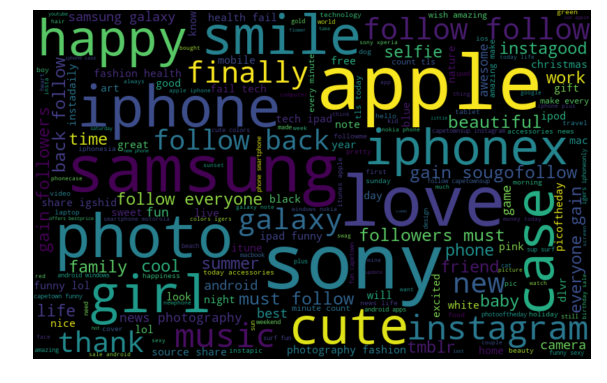

In [21]:
possitive = ' '.join([text for text in train['tweet'][train['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(possitive)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

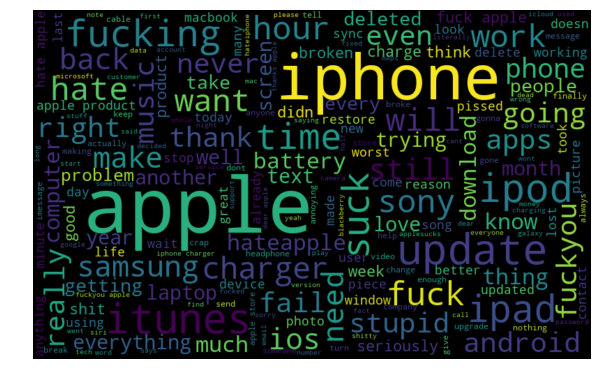

In [22]:
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Stemming
Stemming refers to the removal of suffices, 
like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
For this purpose, we will use PorterStemmer from the NLTK library

In [23]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    #fingerprint #pregnanc test mfqv #android #app...
1    final transpar silicon case thank uncl #yay #s...
2    love thi would #talk #makememori #unplug #rela...
3      wire know georg made that #cute #daventri #home
4    what amaz servic appl even talk about question...
Name: tweet, dtype: object

# Spelling correction and Tokenization

In [24]:
from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))
TextBlob(train['tweet'][0]).ngrams(10)

[WordList(['fingerprint', 'pregnancy', 'test', 'mfqv', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers']),
 WordList(['pregnancy', 'test', 'mfqv', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly']),
 WordList(['test', 'mfqv', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia'])]

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data.
Now, we can finally move on to extracting features using NLP techniques

# TfidfVectorizer :Convert a collection of raw documents to a matrix of TF-IDF features.
With Tfidftransformer you will systematically compute word counts using CountVectorizer and 
then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts,
IDF values, and Tf-idf scores all using the same dataset.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])

train_vect

<9873x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 55909 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<9873x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 65373 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet.
So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library),
let’s check the sentiment of the first few tweets.

In [27]:
train['tweet'][:].apply(lambda x: TextBlob(x).sentiment)

0                                      (0.675, 1.0)
1                                        (0.1, 0.6)
2                                        (0.5, 0.6)
3                                        (0.5, 1.0)
4                      (-0.09999999999999992, 0.95)
5                                      (-0.7, 0.85)
6                                        (0.8, 1.0)
7        (0.03333333333333333, 0.16666666666666666)
8                                        (0.0, 0.0)
9                                        (0.4, 0.6)
10                                       (0.0, 0.0)
11                                      (0.0, 0.35)
12                       (-0.3, 0.6285714285714286)
13       (-0.39444444444444443, 0.6611111111111111)
14                     (-0.44999999999999996, 0.65)
15                                       (0.0, 0.0)
16        (0.31666666666666665, 0.5333333333333333)
17                                      (-0.6, 0.9)
18                                       (0.0, 0.0)
19          

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet.
Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and 
values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model

In [28]:
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['tweet','sentiment']]

,tweet,sentiment
0,#fingerprint #pregnancy test mfqv #android #ap...,0.675000
1,finally transparant silicon case thanks uncle ...,0.100000
2,love this would #talk #makememories #unplug #r...,0.500000
3,wired know george made that #cute #daventry #home,0.500000
4,what amazing service apple even talk about que...,-0.100000
5,iphone software update fucked time stupid iphones,-0.700000
6,happy #instapic #instadaily #sony #xperia #xpe...,0.800000
7,type charger cable ebay #bay #amazon #etsy yea...,0.033333
8,bout shopping again listening music #justme #m...,0.000000
9,photo #fun #selfie #pool #water #sony #camera ...,0.400000


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [30]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tweet'])
bow.shape

(9873, 1000)

In [31]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(train['tweet'])
tfidf.shape

(9873, 1000)

In [32]:
train

,id,label,tweet,hastags,sentiment
0,1,0.0,#fingerprint #pregnancy test mfqv #android #ap...,10,0.675000
1,2,0.0,finally transparant silicon case thanks uncle ...,4,0.100000
2,3,0.0,love this would #talk #makememories #unplug #r...,7,0.500000
3,4,0.0,wired know george made that #cute #daventry #home,3,0.500000
4,5,1.0,what amazing service apple even talk about que...,0,-0.100000
5,6,1.0,iphone software update fucked time stupid iphones,0,-0.700000
6,7,0.0,happy #instapic #instadaily #sony #xperia #xpe...,5,0.800000
7,8,0.0,type charger cable ebay #bay #amazon #etsy yea...,15,0.033333
8,9,0.0,bout shopping again listening music #justme #m...,4,0.000000
9,10,0.0,photo #fun #selfie #pool #water #sony #camera ...,12,0.400000


In [33]:
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

# Gensim.models: Consulting in Machine Learning & NLP

# Word Embeddings
Word Embedding is the representation of text in the form of vectors. 
The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or 
we can use the pre-trained word vectors developed by Google, Wiki, etc.

Here, we will use pre-trained word vectors which can be downloaded from the glove website.
There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example,
I have downloaded the 100-dimensional version of the model.

The first step here is to convert it into the word2vec format.

In [34]:
model_w2v= gensim.models.Word2Vec()

C:\Users\user\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [35]:
model_w2v.build_vocab(tokenized_tweet)

In [36]:
model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(1464226, 2235940)

In [37]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [38]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9873, 100)

In [39]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [40]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [41]:
labeled_tweets = add_label(tokenized_tweet)
labeled_tweets

[LabeledSentence(words=['#fingerprint', '#pregnancy', 'test', 'mfqv', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia'], tags=['tweet_0']),
 LabeledSentence(words=['finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', '#yay', '#sony', '#xperia', '#sonyexperias', 'yget'], tags=['tweet_1']),
 LabeledSentence(words=['love', 'this', 'would', '#talk', '#makememories', '#unplug', '#relax', '#smartphone', '#wifi', '#connect', 'lsupcu'], tags=['tweet_2']),
 LabeledSentence(words=['wired', 'know', 'george', 'made', 'that', '#cute', '#daventry', '#home'], tags=['tweet_3']),
 LabeledSentence(words=['what', 'amazing', 'service', 'apple', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], tags=['tweet_4']),
 LabeledSentence(words=['iphone', 'software', 'update', 'fucked', 'time', 'stupid', 'iphones'], tags=['tweet_5']),
 LabeledSentence(words=['happy', '#instapic', '#instadaily', '#sony', '#xperia', '#x

In [42]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)
model_d2v

C:\Users\user\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\user\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [43]:
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|█████████████████████████████████| 9873/9873 [00:00<00:00, 1645357.73it/s]


In [44]:
model_d2v.train(labeled_tweets, total_examples= len(train['tweet']), epochs=10)

In [45]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(train)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9873, 200)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]


In [48]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data1['label'],  random_state=42, test_size=0.3)

In [49]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7656675749318802

In [50]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('final_sentii_logist_reg.csv', index=False)

In [51]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [52]:

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7877947295423023

In [53]:
train_w2v = wordvec_df.iloc[:7920,:]
test_w2v = wordvec_df.iloc[7920:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [54]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7991994663108738

In [55]:
train_d2v = docvec_df.iloc[:7920,:]
test_d2v = docvec_df.iloc[7920:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [56]:
from sklearn import svm

In [57]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7419132828630421

In [58]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('final_senti_SVC.csv', index=False)

In [59]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.7639484978540771

In [60]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6246575342465753

In [61]:
from sklearn.ensemble import RandomForestClassifier


In [62]:
#Bag-of-Words Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.7163947163947164

In [63]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('final_senti_rf.csv', index=False)

In [64]:
#tf-idf
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.7278382581648524

In [65]:
#Word2Vec Feature

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.7851301115241637

In [66]:
#Doc2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.561904761904762